In [1]:
%pylab inline
from datetime import date
from app import create_app
from app.instrument import Instrument
from app.analysis import Quote
with create_app().app_context():
    quote = Quote([b.symbol for b in Instrument.find_bonds()], 100)
f'from {quote.start.date()} to {date.today()}'

Populating the interactive namespace from numpy and matplotlib


'from 2019-02-27 to 2019-06-07'

In [2]:
stat = quote.statistics(21)
stat = stat[(stat['drawdown'] < 4) & (stat['21-mean'] > 0.4)]
stat

,21-len,21-mean,21-std,21-shrp,drawdown
Symbols,,,,,
VTEB,50,1.077164,0.397517,2.264467,0.333713
MUB,50,1.056411,0.388981,2.260810,0.409122
VCIT,50,1.173348,0.656080,1.518639,0.502684
LQD,50,1.334886,0.864605,1.339208,0.743382
VCLT,50,1.855032,1.256575,1.335401,0.973805
VCSH,50,0.557974,0.304315,1.251905,0.282660
BLV,50,2.090256,1.529723,1.250721,1.732519
PGX,50,0.704657,0.423609,1.245621,1.237112
BND,50,0.962007,0.645789,1.215578,0.703167


In [3]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 2)

['VTEB', 'MUB'] -2.398586664424219 1.9409814352491406 0.185708812622997 -4.5252769122963565
['VTEB', 'VCIT'] -2.589937729751049 0.9840698164528172 0.20909914996766435 -3.7831066961715303
['VTEB', 'LQD'] -2.7658687380519558 0.5685333725494863 0.26927369682858004 -3.603675807430022
['VTEB', 'VCLT'] -2.886040278576258 0.3869488880564931 0.32687955225893106 -3.599868718891682
['VTEB', 'PGX'] -3.6505469695896022 -0.5331649672504843 0.39270627876547815 -3.510088281104596
['MUB', 'PGX'] -3.8226127063338886 -0.7277407085525116 0.41155855302381983 -3.506430550805197


['MUB', 'PGX']

In [4]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 2, ['MUB', 'PGX'], 0, 1)

['PGX', 'VTEB'] -3.6505469695896022 -0.5331649672504843 0.39270627876547815 -3.510088281104596
['MUB', 'PGX'] -3.8226127063338886 -0.7277407085525116 0.41155855302381983 -3.506430550805197


['MUB', 'PGX']

In [6]:
quote.setup_mask(['PGX', 'MUB'])
quote.find_optimal_ratio(21, 1)

(Symbols
 PGX    0.468856
 MUB    0.531144
 dtype: float64, 0.8915, 0.2286)

,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,50.0,0.890624,0.228876,0.438389,0.732309,0.899643,1.054226,1.288132,3.117945,0.327811
MUB,50.0,1.056411,0.388981,0.256944,0.784552,1.121005,1.328064,1.685346,2.260810,0.409122
PGX,50.0,0.704657,0.423609,-0.362674,0.450043,0.633834,0.999413,1.719726,1.245621,1.237112


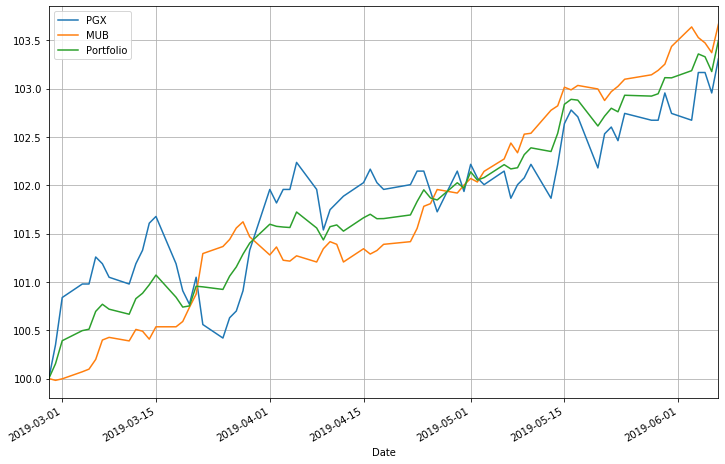

In [6]:
quote.graph(21, {'MUB': 0.531144, 'PGX': 0.468856})